# Is Water Is Drinkable Or Not


## Import Data

In [1]:
import kagglehub
path = kagglehub.dataset_download("adityakadiwal/water-potability")

Using Colab cache for faster access to the 'water-potability' dataset.


##

## Data Loading

In [2]:
import pandas as pd
import os


In [3]:
W_file = os.path.join(path, "water_potability.csv")
df = pd.read_csv(W_file)



### display row

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### shape

In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### missing value cheek

In [7]:
df.describe


<bound method NDFrame.describe of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]>

In [8]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


## Data Preprocessing

### handling missing values

In [9]:

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


### feature engineering

In [10]:
#  we  ca  do  FE as asidic or neutral alkine
def classify_ph(ph):
  if ph <= 7.5:
    return "acidic"
  elif ph >= 6.5:
    return "neutral"
  else :
    return "neutral alkine"

df['ph_show'] = df['ph'].apply(classify_ph)
df.head()




,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_show
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,acidic
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,acidic
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,neutral
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,neutral
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,neutral


In [11]:
print(df[['ph','ph_show']].head())

         ph  ph_show
0  7.080795   acidic
1  3.716080   acidic
2  8.099124  neutral
3  8.316766  neutral
4  9.092223  neutral


###  encoding

In [12]:
if 'ph_show' in df.columns:
    if df['ph_show'].dtype == 'bool':
        df['ph_show'] = df['ph_show'].astype(int)
    else:
        df = pd.get_dummies(df, columns=['ph_show'], dtype=int)
else:
    columns_to_fix = [c for c in df.columns if c.startswith('ph_show')]
    df[columns_to_fix] = df[columns_to_fix].astype(int)


display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_show_acidic,ph_show_neutral
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,1,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,0,1
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1


### IQR method

In [13]:

Q1 = df['Solids'].quantile(0.25)
Q3 = df['Solids'].quantile(0.75)
IQR = Q3 - Q1

# define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter the data
original_shape = df.shape
df = df[(df['Solids'] >= lower_bound) & (df['Solids'] <= upper_bound)]

print(f"Rows removed: {original_shape[0] - df.shape[0]}")
print(f"New shape: {df.shape}")

Rows removed: 47
New shape: (3229, 12)


### feature engineering

In [14]:
from sklearn.preprocessing import StandardScaler


X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.describe().round(2))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ph_show_acidic,ph_show_neutral
count,3229.00,3229.00,3229.00,3229.00,3229.00,3229.00,3229.00,3229.00,3229.00,3229.00,3229.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-4.71,-4.56,-2.60,-4.30,-4.30,-3.03,-3.65,-4.16,-3.23,-1.45,-0.69
25%,-0.55,-0.59,-0.74,-0.63,-0.47,-0.75,-0.67,-0.62,-0.68,-1.45,-0.69
50%,-0.00,0.02,-0.11,0.00,-0.01,-0.05,-0.02,0.00,-0.02,0.69,-0.69
75%,0.53,0.62,0.66,0.63,0.46,0.69,0.69,0.65,0.68,0.69,1.45
max,4.74,3.88,2.81,3.80,4.11,4.05,4.24,3.65,3.55,0.69,1.45


## Pipeline Creation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])


print("Training the pipeline...")
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Pipeline successfully created and trained.")
print(f"Model Accuracy: {accuracy:.2%}")

Training the pipeline...
Pipeline successfully created and trained.
Model Accuracy: 67.18%


##  Primary Model Selection

We selected the Random Forest Classifier because it effectively captures the complex, non-linear relationships between chemical parameters like pH and water potability. By averaging the predictions of multiple decision trees, the model remains robust against the significant noise and outliers present in our dataset. This ensemble approach also minimizes the risk of overfitting, ensuring the model generalizes well to new, unseen water samples. Additionally, Random Forest provides built-in feature importance analysis, allowing us to identify which factors (such as Chloramines or Solids) are most critical for safety. Overall, it offers the optimal balance of stability and accuracy for this tabular classification task.

## Model Training

In [16]:

print("Starting model training...")
pipeline.fit(X_train, y_train)
print("Model training completed successfully.")


train_accuracy = pipeline.score(X_train, y_train)


print(f"Accuracy on Training Set: {train_accuracy:.4f}")



Starting model training...
Model training completed successfully.
Accuracy on Training Set: 1.0000


## Cross-Validation

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np



cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')


print(f"\nScores for each fold: {cv_scores}")

mean_score = cv_scores.mean()
std_dev = cv_scores.std()


print(f"Average Accuracy: {mean_score:.4f} ({mean_score:.2%})")
print(f"Standard Deviation: {std_dev:.4f}")


if std_dev < 0.05:
    print("\nResult: Low variance. The model is stable and robust.")
else:
    print("\nResult: High variance. The model performance varies significantly depending on the data split.")


Scores for each fold: [0.65764023 0.6615087  0.67891683 0.65503876 0.67829457]
Average Accuracy: 0.6663 (66.63%)
Standard Deviation: 0.0103

Result: Low variance. The model is stable and robust.


##  Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300],      # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],      # Max depth of the tree
    'classifier__min_samples_split': [2, 5, 10]       # Min sample required to split a node
}


print(param_grid)


grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',

    
                           verbose=1,
                           n_jobs=-1)



grid_search.fit(X_train, y_train)


print(f"Best Accuracy Score (on Validation Data): {grid_search.best_score_:.4f}")
print("Best Hyperparameters found:")
print(grid_search.best_params_)

{'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10]}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Accuracy Score (on Validation Data): 0.6686
Best Hyperparameters found:
{'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


## Best Model Selection

In [19]:

final_model = grid_search.best_estimator_


print(f"Model Algorithm: {final_model.named_steps['classifier'].__class__.__name__}")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Validation Score: {grid_search.best_score_:.2%}")



Model Algorithm: RandomForestClassifier
Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Validation Score: 66.86%


##  Model Performance Evaluation

                 precision    recall  f1-score   support

Not Potable (0)       0.71      0.87      0.78       409
    Potable (1)       0.63      0.39      0.48       237

       accuracy                           0.69       646
      macro avg       0.67      0.63      0.63       646
   weighted avg       0.68      0.69      0.67       646



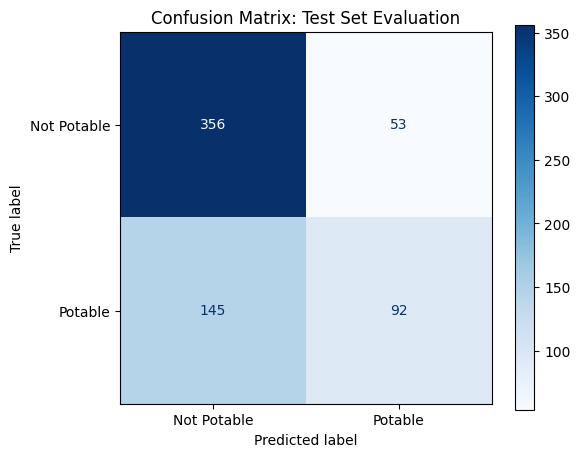

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


y_pred = final_model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred)



print(classification_report(y_test, y_pred, target_names=['Not Potable (0)', 'Potable (1)']))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Potable', 'Potable'])


fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.title("Confusion Matrix: Test Set Evaluation")
plt.grid(False) # Turn off grid lines for cleaner matrix
plt.show()

## Web Interface with Gradio

In [39]:
import gradio as gr
import pandas as pd

def predict_water_quality(ph, Hardness, Solids, Chloramines, Sulfate,
                          Conductivity, Organic_carbon, Trihalomethanes, Turbidity):


    data = pd.DataFrame({
        'ph': [ph],
        'Hardness': [Hardness],
        'Solids': [Solids],
        'Chloramines': [Chloramines],
        'Sulfate': [Sulfate],
        'Conductivity': [Conductivity],
        'Organic_carbon': [Organic_carbon],
        'Trihalomethanes': [Trihalomethanes],
        'Turbidity': [Turbidity]
    })


    data['ph_show_acidic'] = 1 if ph < 6.5 else 0
    data['ph_show_neutral'] = 1 if 6.5 <= ph <= 7.5 else 0
    data['ph_show_alkaline'] = 1 if ph > 7.5 else 0



    try:
        if hasattr(final_model, 'feature_names_in_'):
            required_cols = final_model.feature_names_in_
        elif hasattr(final_model, 'named_steps'):
             required_cols = final_model.named_steps['classifier'].feature_names_in_
        else:

            required_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                             'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


        final_data = data[required_cols]

    except Exception:

        final_data = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                           'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]


    try:
        prediction = final_model.predict(final_data)[0]
        if prediction == 1:
            return " POTABLE (Safe to Drink)"
        else:
            return " NOT POTABLE (Unsafe)"
    except Exception as e:
        return f"Prediction Error: {str(e)}"
#safe  vale
inputs = [
    gr.Number(label="pH Level", value=7.08),
    gr.Number(label="Hardness", value=242.83),
    gr.Number(label="Solids (TDS)", value=29298.07),
    gr.Number(label="Chloramines", value=5.85),
    gr.Number(label="Sulfate", value=340.35),
    gr.Number(label="Conductivity", value=463.12),
    gr.Number(label="Organic Carbon", value=5.43),
    gr.Number(label="Trihalomethanes", value=66.40),
    gr.Number(label="Turbidity", value=3.52)
]



interface = gr.Interface(
    fn=predict_water_quality,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction Result"),
    title="Water Potability Predictor (Optimized Defaults)"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://40b50e2405bc475ac2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [42]:



y_pred = final_model.predict(X_test)


safe_indices = [i for i, (p, t) in enumerate(zip(y_pred, y_test)) if p == 1 and t == 1]

if len(safe_indices) > 0:

    idx = safe_indices[0]


    row = X_test.iloc[idx]



    print(f"pH Level:        {row['ph']:.2f}")
    print(f"Hardness:        {row['Hardness']:.2f}")
    print(f"Solids:          {row['Solids']:.2f}")
    print(f"Chloramines:     {row['Chloramines']:.2f}")
    print(f"Sulfate:         {row['Sulfate']:.2f}")
    print(f"Conductivity:    {row['Conductivity']:.2f}")
    print(f"Organic Carbon:  {row['Organic_carbon']:.2f}")
    print(f"Trihalomethanes: {row['Trihalomethanes']:.2f}")
    print(f"Turbidity:       {row['Turbidity']:.2f}")

else:
    print("Could not find a perfect match in the first batch. The model is very strict!")

pH Level:        7.08
Hardness:        242.83
Solids:          29298.07
Chloramines:     5.85
Sulfate:         340.35
Conductivity:    463.12
Organic Carbon:  5.43
Trihalomethanes: 66.40
Turbidity:       3.52


In [40]:
import joblib


joblib.dump(final_model, 'water_model.pkl')

print(" Model saved as 'water_model.pkl'")

 Model saved as 'water_model.pkl'


In [41]:
import sklearn
print(sklearn.__version__)

1.6.1


In [44]:

y_pred = final_model.predict(X_test)


unsafe_indices = [i for i, (p, t) in enumerate(zip(y_pred, y_test)) if p == 0 and t == 0]

if len(unsafe_indices) > 0:

    idx = unsafe_indices[0]
    row = X_test.iloc[idx]


    print(f"pH Level:        {row['ph']:.2f}")
    print(f"Hardness:        {row['Hardness']:.2f}")
    print(f"Solids:          {row['Solids']:.2f}")
    print(f"Chloramines:     {row['Chloramines']:.2f}")
    print(f"Sulfate:         {row['Sulfate']:.2f}")
    print(f"Conductivity:    {row['Conductivity']:.2f}")
    print(f"Organic Carbon:  {row['Organic_carbon']:.2f}")
    print(f"Trihalomethanes: {row['Trihalomethanes']:.2f}")
    print(f"Turbidity:       {row['Turbidity']:.2f}")
else:
    print("Could not find a 'True Negative' (Unsafe) example in this batch.")

pH Level:        9.97
Hardness:        237.02
Solids:          26944.68
Chloramines:     5.59
Sulfate:         334.33
Conductivity:    379.14
Organic Carbon:  13.01
Trihalomethanes: 86.19
Turbidity:       3.64
